<a href="https://colab.research.google.com/github/avishek-astra/Deep_Learning_Experiments/blob/main/Meta_lossfunc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import libraries
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

Mean-squared error

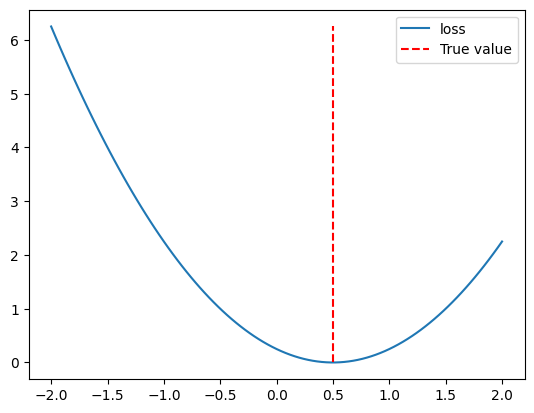

In [4]:
#loss function
lossfunMSE=nn.MSELoss()
#create predictions and real answer
yHat=torch.linspace(-2,2,101)
y=torch.tensor(.5)
#compute MSE loss function
L=np.zeros(101)
for i,yy in enumerate(yHat):
  L[i]=lossfunMSE(yy,y)
plt.plot(yHat,L, label='loss')
plt.plot([y,y],[0,np.max(L)],'r--',label='True value')
plt.legend()
plt.show()

Binary cross-entropy

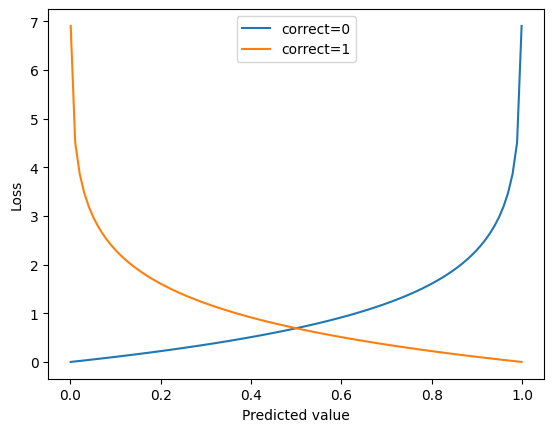

In [7]:
#loss function
lossfunBCE=nn.BCELoss()
#create predictions and real answer
yHat=torch.linspace(.001,.999,101)
y1=torch.tensor(0.)
y2=torch.tensor(1.)
#compute MSE loss function
L=np.zeros((101,2))
for i,yy in enumerate(yHat):
  L[i,0]=lossfunBCE(yy,y1) # 0 is the correct answer
  L[i,1]=lossfunBCE(yy,y2) # 1 is the correct answer
plt.plot(yHat,L)
plt.xlabel('Predicted value')
plt.ylabel('Loss')
plt.legend(['correct=0','correct=1'])
plt.show()


In [9]:
#The example above shows data already in probabilities.
# yHat=torch.tensor(2.)
# print(lossfunBCE(yHat,y1))
#CONVERT to prob via sigmoid
sig=nn.Sigmoid()
print(lossfunBCE(sig(yHat),y1))

tensor(2.1269)


In [10]:
lossfunBCE=nn.BCEWithLogitsLoss()
yHat=torch.tensor(2.)
print(lossfunBCE(yHat,y2))

tensor(0.1269)


Catergorical Cross-entropy

In [11]:
#loss function
lossfunCCE=nn.CrossEntropyLoss()
yHat=torch.tensor([[1.,4,3]])
for i in range(3):
  correctAnswer=torch.tensor([i])
  thisloss=lossfunCCE(yHat,correctAnswer).item()
  print('Loss when correct answer is %g:%g'%(i,thisloss))
#

Loss when correct answer is 0:3.34901
Loss when correct answer is 1:0.349012
Loss when correct answer is 2:1.34901


In [12]:
#Repeat using pre_softmaxified output
sm = nn.Softmax(dim=1)
yHat_sm = sm(yHat)

for i in range(3):
  correctAnswer = torch.tensor([i])
  thisloss = lossfunCCE(yHat_sm,correctAnswer).item()
  print( 'Loss when correct answer is %g: %g' %(i,thisloss) )

Loss when correct answer is 0: 1.43658
Loss when correct answer is 1: 0.766318
Loss when correct answer is 2: 1.21221


In [13]:
#compare raw,softmax and log-softmax outputs
sm=nn.LogSoftmax(dim=1)
yHat_logsm=sm(yHat)
#print them
print(yHat)
print(yHat_sm)
print(yHat_logsm)

tensor([[1., 4., 3.]])
tensor([[0.0351, 0.7054, 0.2595]])
tensor([[-3.3490, -0.3490, -1.3490]])


Creating your own custom loss function

In [14]:
class myLoss(nn.Module): # inherent info from nn.Module
  def __init__(self):
    super().__init__()

  def forward(self,x,y):
    loss = torch.abs(x-y)
    return loss

# test it out!
lfun = myLoss()
lfun(torch.tensor(4),torch.tensor(5.2))

tensor(1.2000)